In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from ast import literal_eval
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import sparse as sp_sparse
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from sklearn.model_selection import train_test_split
data = pd.read_csv('/content/gdrive/My Drive/project/50000.csv',encoding='ISO-8859-1')
# data['tags'] = data['tags'].apply(literal_eval)
# x = data.nutrition
x = data.drop(["name","id","contributor_id","nutrition","submitted","steps","tags","description","ingredients"],axis = 1)
y = data.healthy


In [ ]:
data['tags'] = data['tags'].apply(literal_eval)
tags = data['tags'].values
print (tags)
tag_dic={}
for tag_list in tags:
    for tag in tag_list:        
        if tag not in tag_dic:
            tag_dic[tag]=1
        else:
             tag_dic[tag]+=1
df = pd.DataFrame(list(tag_dic.items()), columns=['tag', 'count']).sort_values(by = 'count',axis = 0,ascending = False)
print('Total number of labels:',len(df))
df.head(20)

[list(['time-to-make', 'course', 'preparation', 'low-protein', 'healthy', '5-ingredients-or-less', 'very-low-carbs', 'sauces', 'condiments-etc', 'easy', 'low-fat', 'dietary', 'low-sodium', 'low-saturated-fat', 'low-calorie', 'low-carb', 'healthy-2', 'low-in-something', '4-hours-or-less'])
 list(['60-minutes-or-less', 'time-to-make', 'main-ingredient', 'preparation', 'healthy', '5-ingredients-or-less', 'vegetables', 'easy', 'low-fat', 'dietary', 'low-sodium', 'low-saturated-fat', 'low-calorie', 'low-in-something', 'corn', '3-steps-or-less'])
 list(['15-minutes-or-less', 'time-to-make', 'course', 'preparation', 'for-1-or-2', '5-ingredients-or-less', 'desserts', 'easy', 'candy', 'dietary', 'low-sodium', 'gluten-free', 'free-of-something', 'low-in-something', 'number-of-servings', '3-steps-or-less'])
 ...
 list(['15-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'north-american', 'for-large-groups', 'low-protein', 'healthy', '5-ingredients-or-less'

,tag,count
2,preparation,1116
9,easy,1099
0,time-to-make,1085
5,5-ingredients-or-less,1077
1,course,960
11,dietary,941
17,low-in-something,741
24,15-minutes-or-less,649
20,main-ingredient,631
12,low-sodium,532


In [ ]:
df

,tag,count
2,preparation,49899
0,time-to-make,48802
1,course,46833
9,easy,44607
11,dietary,38307
...,...,...
442,hidden-valley-ranch,1
444,heirloom-historical-recipes,1
488,hunan,1
489,halloween-cocktails,1


In [ ]:
print(x)
print(x.shape)

      minutes  healthy  low-fat  ...  protein  stated_fat  total_carbonhydrate
0         155        1        1  ...        0           0                    1
1          35        1        1  ...        8           1                    8
2           5        0        0  ...        3          37                    8
3         900        0        0  ...        4         137                    1
4          12        0        0  ...       12           7                    0
...       ...      ...      ...  ...      ...         ...                  ...
1114       25        1        0  ...       11           1                    9
1115      330        0        0  ...      185          51                    0
1116       15        1        1  ...        0           0                    0
1117        5        0        0  ...       21          16                    0
1118       20        1        1  ...        4           0                    8

[1119 rows x 14 columns]
(1119, 14)


In [ ]:
print(y)

0       1
1       1
2       0
3       0
4       0
       ..
1114    1
1115    0
1116    1
1117    0
1118    1
Name: healthy, Length: 1119, dtype: int64


In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Convert each category in the label to an integer
# le = LabelEncoder()
# y= le.fit_transform(y)
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=1/5,random_state=0)

In [ ]:
np.random.seed(200)
np.random.shuffle(X_train) 
np.random.seed(200)
np.random.shuffle(X_test)
 
np.random.seed(200)
np.random.shuffle(y_train) 
np.random.seed(200)
np.random.shuffle(y_test)

KeyError: ignored

In [ ]:
print(y)
print(y.shape)

0        1
1        1
2        0
3        1
4        1
        ..
49995    1
49996    1
49997    0
49998    0
49999    0
Name: healthy, Length: 50000, dtype: int64
(50000,)


In [ ]:
print(y_train)

20330    0
17532    1
45819    0
34807    1
31888    0
        ..
21243    1
45891    0
42613    0
43567    0
2732     0
Name: healthy, Length: 40000, dtype: int64


In [ ]:
print(X_train)

       minutes  healthy  ...  stated_fat  total_carbonhydrate
20330       70        0  ...          29                    6
17532       60        1  ...           6                   13
45819       50        0  ...           0                    5
34807      130        1  ...           0                    5
31888       25        0  ...          12                    3
...        ...      ...  ...         ...                  ...
21243       10        1  ...          29                    9
45891       10        0  ...           0                    1
42613       20        0  ...           0                    0
43567        1        0  ...           0                    1
2732        20        0  ...          58                   18

[40000 rows x 18 columns]


 **K-NN**

In [ ]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier


# Declare an of the KNN classifier class with the value with neighbors.
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the model with training data and target values
knn.fit(X_train,y_train)


# Prints the data provided
print(x)

# Store predicted class labels of X
prediction = knn.predict(x)

# Prints the predicted class labels of X
print(prediction)

       minutes  healthy  ...  stated_fat  total_carbonhydrate
0         1485        1  ...           6                   12
1           35        1  ...           0                   27
2           25        0  ...           0                    0
3            5        1  ...           0                    4
4          125        1  ...          26                    8
...        ...      ...  ...         ...                  ...
49995       10        1  ...          14                   16
49996       25        1  ...           9                    2
49997       40        0  ...          23                    9
49998       10        0  ...          30                    4
49999       45        0  ...           1                    2

[50000 rows x 18 columns]
[1 1 0 ... 0 0 0]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,21): # Declare an of the KNN classifier class with the value with neighbors.

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train) # Fit the model with training data and target values
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [ ]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [ ]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 80.45 % and k = [5]


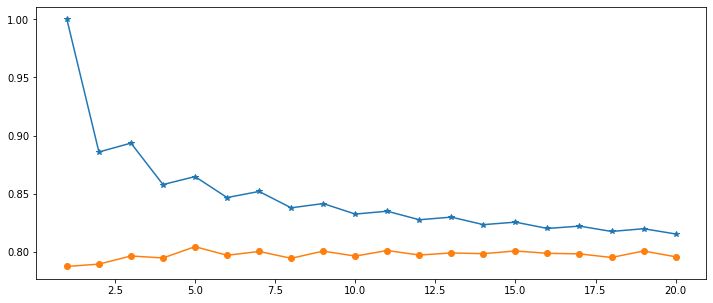

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(range(1,21),train_scores,marker='*',label='Train Score')
plt.plot(range(1,21),test_scores,marker='o',label='Test Score')

In [ ]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(5)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.8045

In [ ]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
#confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,6654,792,7446
1,1163,1391,2554
All,7817,2183,10000


In [ ]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      7446
           1       0.64      0.54      0.59      2554

    accuracy                           0.80     10000
   macro avg       0.74      0.72      0.73     10000
weighted avg       0.80      0.80      0.80     10000



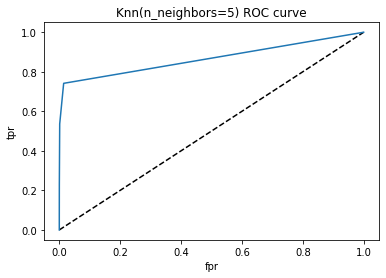

In [ ]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=5) ROC curve')
plt.show()

In [ ]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8670823297620182

In [227]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,25)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.9992750000000001
Best Parameters: {'n_neighbors': 1}


**NAIVE** **BAYES**

In [228]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix


In [229]:
# Initiating the Gaussian Classifier
mod = GaussianNB()

# Training your model 
mod.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [230]:
# Predicting Outcome 
predicted = mod.predict(X_test)

In [231]:
mod.score(X_test,y_test)

1.0

In [232]:
# Confusion Matrix
y_pred = mod.predict(X_test)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[7446    0]
 [   0 2554]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7446
           1       1.00      1.00      1.00      2554

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



**Decision Tree**

In [233]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy',max_depth=8, max_features=10, random_state=0)
dt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


In [234]:
y_pred = dt.predict(X_test)

In [235]:
from sklearn.metrics import classification_report, confusion_matrix  

print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[7446    0]
 [   0 2554]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7446
           1       1.00      1.00      1.00      2554

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



**NN**

In [236]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier 
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

In [237]:
from sklearn.neural_network import MLPClassifier  
mlp = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1000,verbose=2)  
mlp.fit(X_train, y_train)  

Iteration 1, loss = 0.32169679
Iteration 2, loss = 0.04159579
Iteration 3, loss = 0.00912375
Iteration 4, loss = 0.00378000
Iteration 5, loss = 0.00211742
Iteration 6, loss = 0.00132594
Iteration 7, loss = 0.00090647
Iteration 8, loss = 0.00066757
Iteration 9, loss = 0.00050926
Iteration 10, loss = 0.00039568
Iteration 11, loss = 0.00031700
Iteration 12, loss = 0.00025532
Iteration 13, loss = 0.00020971
Iteration 14, loss = 0.00017369
Iteration 15, loss = 0.00014458
Iteration 16, loss = 0.00012253
Iteration 17, loss = 0.00010444
Iteration 18, loss = 0.00008993
Iteration 19, loss = 0.00007831
Iteration 20, loss = 0.00006855
Iteration 21, loss = 0.00006038
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=2, warm_start=False)

In [238]:
predictions = mlp.predict(X_test)

from sklearn import metrics 
print("Accuracy", metrics.accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  

Accuracy 0.9998
[[7445    1]
 [   1 2553]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7446
           1       1.00      1.00      1.00      2554

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [239]:
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


In [240]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib 
import pandas as pd
import numpy as np

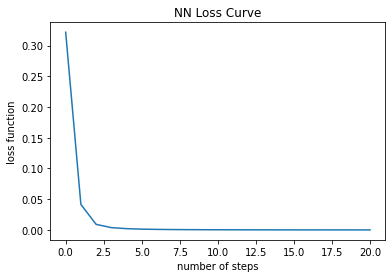

In [241]:
plt.plot(mlp.loss_curve_)
plt.title("NN Loss Curve")
plt.xlabel("number of steps")
plt.ylabel("loss function")
plt.show()

In [242]:
(mlp.intercepts_[0]).shape

(10,)

In [243]:
(mlp.coefs_[0]).shape

(18, 10)

In [244]:
mlp.intercepts_[0]

array([ 0.83780901,  0.42039349, -0.10620751, -0.07878452,  0.17773946,
        0.40311738,  0.64272474, -0.04610083,  0.64138441,  0.74087464])

In [245]:
mlp.coefs_[0]

array([[-0.08325581,  0.10304447, -0.39940793,  0.42668046, -0.48025464,
        -0.56298142,  0.37604821, -0.31366558, -0.38367741, -0.45598217],
       [-0.94540326, -0.53099835, -0.77489228,  0.60118618,  0.08012637,
         0.03065403, -0.81021852,  0.89029253,  1.138647  , -0.3387866 ],
       [ 0.09231128, -0.19128597, -0.01940649,  0.02907372,  0.66971803,
         0.1910208 , -0.58061742,  0.21759412, -0.13527237, -0.54966974],
       [ 0.40076779,  0.10437271,  0.10708917, -0.14779569,  0.05469033,
         0.15520279, -0.47562518,  0.1791784 , -0.06996429, -0.69837777],
       [ 0.40736834, -0.20863665, -0.28250976, -0.18441539,  0.1702345 ,
        -0.41256139,  0.03809073, -0.17463787,  0.56647707, -0.23906035],
       [-0.32005005, -0.67227967, -0.53312857,  0.34717296,  0.41214755,
        -0.63401254, -0.48333428,  0.05345095, -0.42369451, -0.22754858],
       [-0.09593369,  0.12938485,  0.23303277, -0.21133967,  0.52577699,
        -0.466999  , -0.30393549,  0.10054997

In [246]:
#Adjust the number of hidde Layer/ hidden node to improve the NN performance. Write your code below.

mlp = MLPClassifier(hidden_layer_sizes=(50,50), max_iter=1000,verbose=2)  
mlp.fit(X_train, y_train) 

predictions = mlp.predict(X_test)  

Iteration 1, loss = 0.09806171
Iteration 2, loss = 0.00225064
Iteration 3, loss = 0.00066754
Iteration 4, loss = 0.00033373
Iteration 5, loss = 0.00019726
Iteration 6, loss = 0.00013575
Iteration 7, loss = 0.00009835
Iteration 8, loss = 0.00007771
Iteration 9, loss = 0.00006462
Iteration 10, loss = 0.00005581
Iteration 11, loss = 0.00004945
Iteration 12, loss = 0.00004476
Iteration 13, loss = 0.00004128
Iteration 14, loss = 0.00003858
Iteration 15, loss = 0.00003651
Iteration 16, loss = 0.00003484
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


In [247]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
print("Accuracy", metrics.accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))

Accuracy 0.9999
[[7446    0]
 [   1 2553]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7446
           1       1.00      1.00      1.00      2554

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



**Logistic** **Regression**

In [248]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=0.01, max_iter=10000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 1.000
Test set score: 1.000


In [249]:
logreg.intercept_.T

array([-2.6884466])

In [250]:
logreg.coef_.T

array([[-7.22846003e-03],
       [ 3.42072024e+00],
       [ 5.98140854e-01],
       [ 6.91305207e-02],
       [ 2.22590538e-01],
       [ 6.03007232e-01],
       [ 9.53156637e-02],
       [-3.58254588e-04],
       [-1.00406364e-03],
       [ 4.46058599e-02],
       [ 2.25535146e-02],
       [ 3.31487036e-02],
       [-1.68268879e-01],
       [ 3.01374798e-02],
       [-1.82687559e-03],
       [ 1.00546205e-01],
       [-2.18784237e-01],
       [ 7.55869373e-02]])

In [251]:
print(y_test)

11841    0
19602    1
45519    0
25747    0
42642    0
        ..
25091    0
27853    0
47278    0
37020    0
2217     0
Name: healthy, Length: 10000, dtype: int64


In [252]:
from sklearn.metrics import classification_report, confusion_matrix  
y_pred = logreg.predict(X_test)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))
##before processing data in PCA, we got 0.73 accurancy, from this we can observe the accurancy do not decrease a lot
#we can also normally use the model, and largely reduce caculation by using PCA

[[7446    0]
 [   0 2554]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7446
           1       1.00      1.00      1.00      2554

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [253]:
#!conda install -c conda-forge scikit-plot
import matplotlib.pyplot as plt
import scikitplot as skplt
y_pred_probas = logreg.predict_proba(X_test)

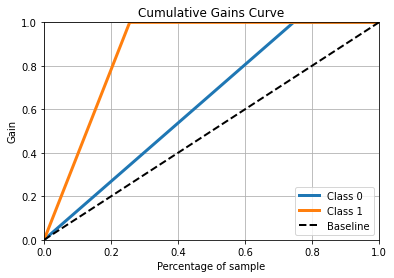

In [254]:
skplt.metrics.plot_cumulative_gain(y_test, y_pred_probas)
plt.show()

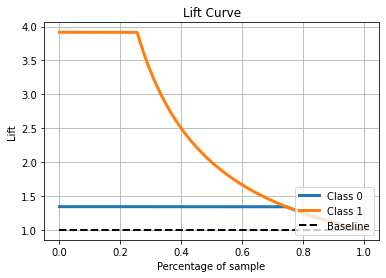

In [255]:
skplt.metrics.plot_lift_curve(y_test, y_pred_probas)
plt.show()